In [ ]:
import pandas as pd

df = pd.read_csv("/content/btc_usd.csv")

df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,314.2489929199219,320.43499755859375,314.00299072265625,320.43499755859375,8036550
3,2015-01-02,315.0320129394531,315.8389892578125,313.56500244140625,314.0790100097656,7860650
4,2015-01-03,281.0820007324219,315.1499938964844,281.0820007324219,314.84600830078125,33054400


In [ ]:
import pandas as pd

df_raw = pd.read_csv("/content/btc_usd.csv")


if "Price" in df_raw.columns:
    df_raw = df_raw.rename(columns={"Price": "Date"})


df_clean = df_raw[df_raw["Date"].str.match(r"\d{4}-\d{2}-\d{2}", na=False)]


df_clean["Date"] = pd.to_datetime(df_clean["Date"])


for col in df_clean.columns:
    if col != "Date":
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

df_clean = df_clean.set_index("Date")

df_clean.head()


/tmp/ipython-input-4183189242.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Date"] = pd.to_datetime(df_clean["Date"])
/tmp/ipython-input-4183189242.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")


df = df_clean.copy()


df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


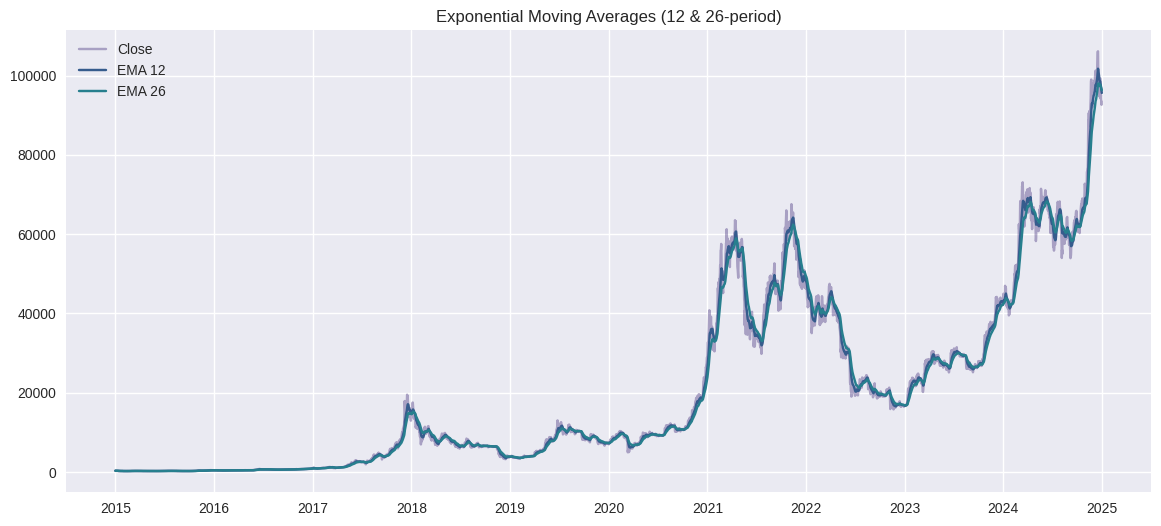

In [ ]:
df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(14,6))
plt.plot(df["Close"], label="Close", alpha=0.4)
plt.plot(df["EMA_12"], label="EMA 12")
plt.plot(df["EMA_26"], label="EMA 26")
plt.title("Exponential Moving Averages (12 & 26-period)")
plt.legend()
plt.show()

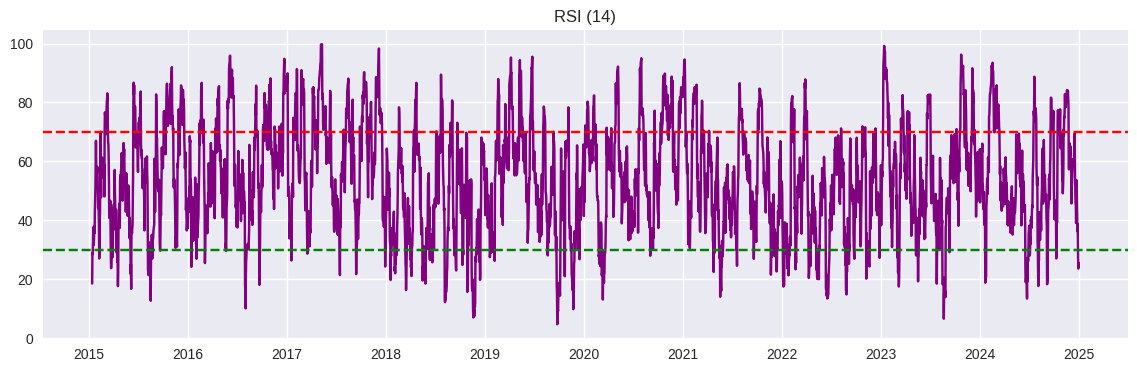

In [ ]:
window = 14
delta = df["Close"].diff()

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window).mean()
avg_loss = loss.rolling(window).mean()

rs = avg_gain / avg_loss
df["RSI"] = 100 - (100 / (1 + rs))

plt.figure(figsize=(14,4))
plt.plot(df["RSI"], label="RSI", color="purple")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI (14)")
plt.show()

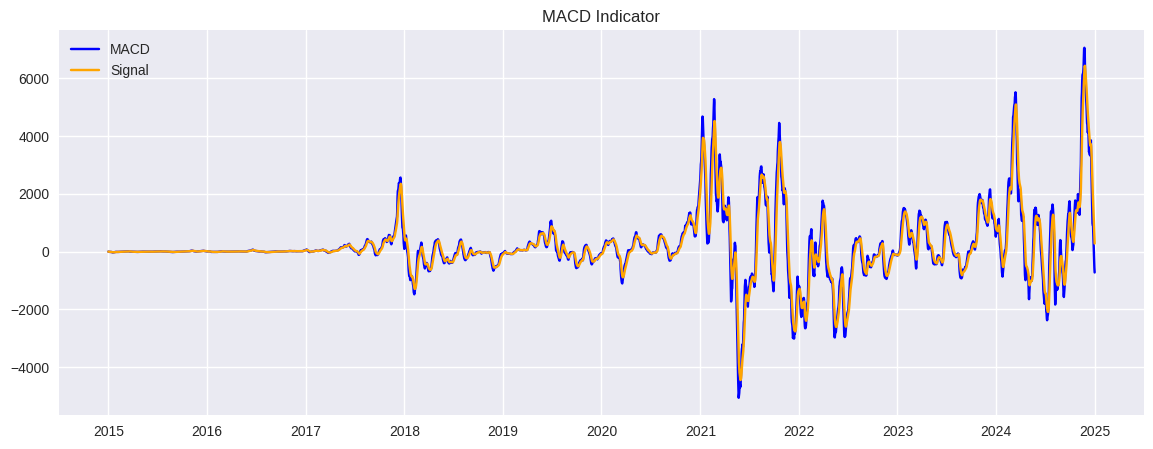

In [ ]:
df["MACD"] = df["EMA_12"] - df["EMA_26"]
df["Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(14,5))
plt.plot(df["MACD"], label="MACD", color="blue")
plt.plot(df["Signal"], label="Signal", color="orange")
plt.title("MACD Indicator")
plt.legend()
plt.show()

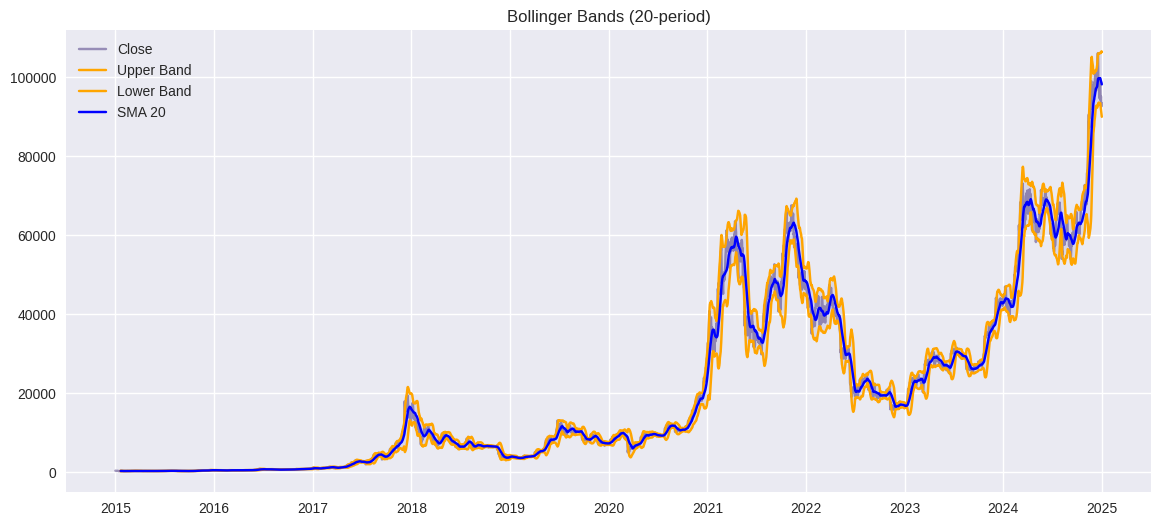

In [ ]:
df["SMA_20"] = df["Close"].rolling(window=20).mean()
df["STD_20"] = df["Close"].rolling(window=20).std()

df["Upper_Band"] = df["SMA_20"] + (2 * df["STD_20"])
df["Lower_Band"] = df["SMA_20"] - (2 * df["STD_20"])

plt.figure(figsize=(14,6))
plt.plot(df["Close"], label="Close", alpha=0.5)
plt.plot(df["Upper_Band"], label="Upper Band", color="orange")
plt.plot(df["Lower_Band"], label="Lower Band", color="orange")
plt.plot(df["SMA_20"], label="SMA 20", color="blue")
plt.fill_between(df.index, df["Lower_Band"], df["Upper_Band"], alpha=0.1)
plt.title("Bollinger Bands (20-period)")
plt.legend()
plt.show()


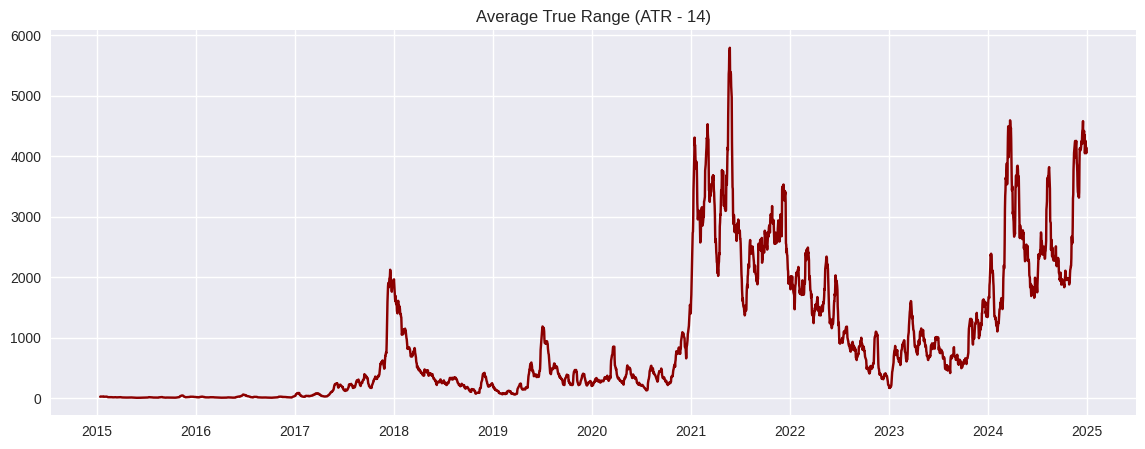

In [ ]:
df["H-L"] = df["High"] - df["Low"]
df["H-PC"] = abs(df["High"] - df["Close"].shift(1))
df["L-PC"] = abs(df["Low"] - df["Close"].shift(1))

df["TR"] = df[["H-L", "H-PC", "L-PC"]].max(axis=1)

df["ATR"] = df["TR"].rolling(14).mean()

plt.figure(figsize=(14,5))
plt.plot(df["ATR"], label="ATR", color="darkred")
plt.title("Average True Range (ATR - 14)")
plt.show()

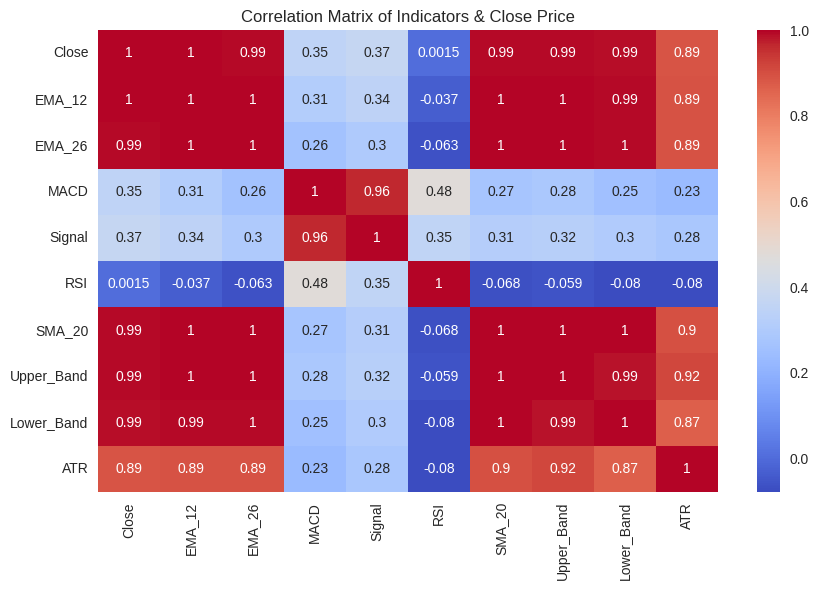

In [ ]:
df_indicators = df[[
    "Close", "EMA_12", "EMA_26", "MACD", "Signal",
    "RSI", "SMA_20", "Upper_Band", "Lower_Band", "ATR"
]]

df_indicators.tail()
plt.figure(figsize=(10,6))
sns.heatmap(df_indicators.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Indicators & Close Price")
plt.show()
